Q3. Write a program to perform histogram equalization on the image “home.jpg” to enhance 
its contrast. Also implement gamma correction on the image “sunset.jpg” using different 
gamma values. Check which one gives the best output. Use the histogram equalization method 
on the image “sunset.jpg” and compare the equalized image with the best gamma corrected 
image. 

In [1]:
#Importing all the neccessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_1 = cv2.imread("home.jpg")# reading image home
img_2 = cv2.imread('sunset.jpg')# reading image sunset


In [3]:
img_1.shape,img_2.shape # printing the shape of the both images

((202, 315, 3), (427, 640, 3))

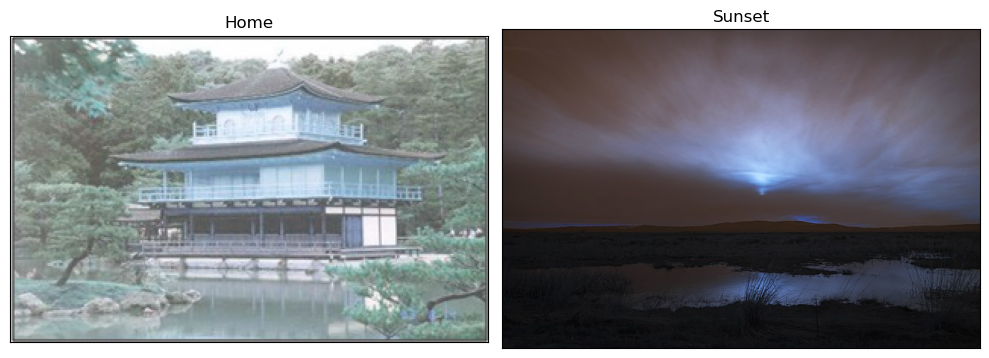

In [4]:
# plotting both images using matplolib
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Home")
plt.imshow(img_1)
plt.xticks([])
plt.yticks([])


plt.subplot(1,2,2)
plt.title("Sunset")
plt.imshow(img_2)
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

### **Histogram**
Opencv official documentry : https://docs.opencv.org/4.x/d1/db7/tutorial_py_histogram_begins.html

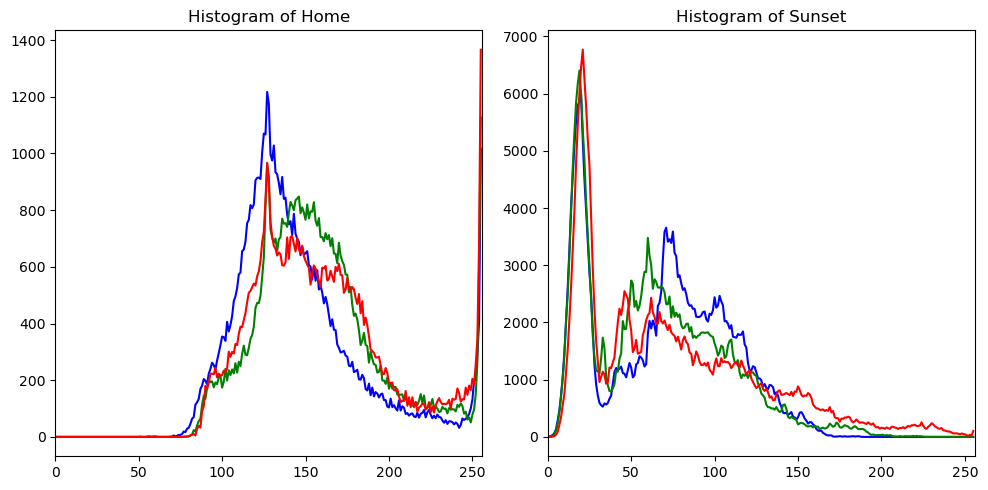

In [5]:
color = ('b','g','r') # defining the color channels as r g b
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Histogram of Home")
for i,col in enumerate(color): # for looping throug all colours r g b
    histr = cv2.calcHist([img_1],[i], None, [256], [0,256]) # calculating histogram using cv2.calHist method
    plt.plot(histr, color=col) # plotting hist and color
    plt.xlim([0,256])

# Doing same thing as above
plt.subplot(1,2,2)
plt.title("Histogram of Sunset")
for i,col in enumerate(color):
    histr = cv2.calcHist([img_2],[i], None, [256], [0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])
plt.tight_layout()
plt.show()

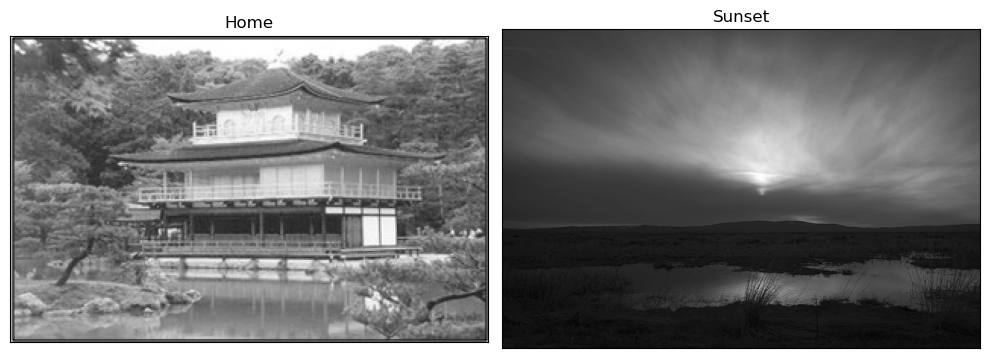

In [6]:
img_1_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY) # Gray scaling the images
img_2_gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Home")
plt.imshow(img_1_gray, cmap= "gray")
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.title("Sunset")
plt.imshow(img_2_gray, cmap= "gray")
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

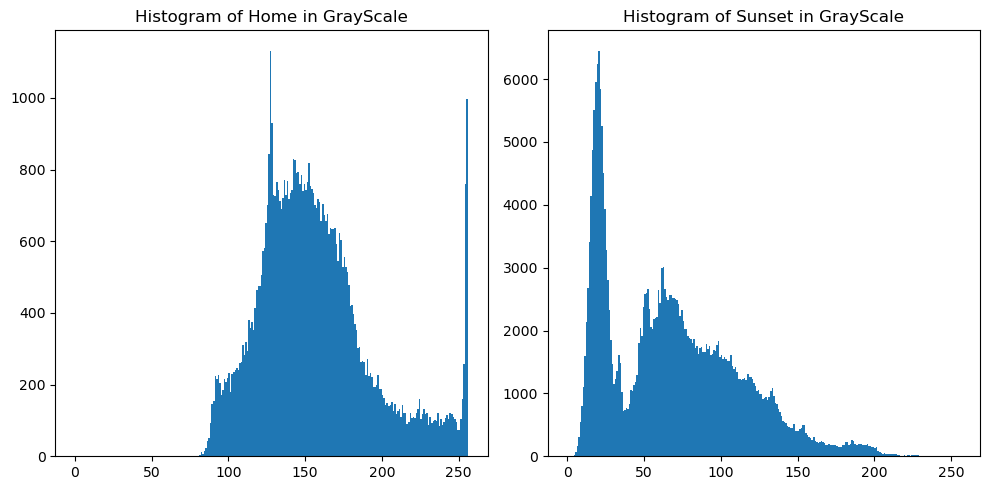

In [7]:
# calculationg histogram of grayscale images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(img_1_gray.ravel(), 256,[0,256])
plt.title("Histogram of Home in GrayScale")

plt.subplot(1,2,2)
plt.hist(img_2_gray.ravel(), 256,[0,256])
plt.title("Histogram of Sunset in GrayScale")

plt.tight_layout()
plt.show()

In [8]:
# cv2.imshow("Home", img_1)
# cv2.imshow("sunset", img_2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### **Histogram Equalisation**
https://docs.opencv.org/3.4/d5/daf/tutorial_py_histogram_equalization.html

### Histogram Equalisation of Color Image

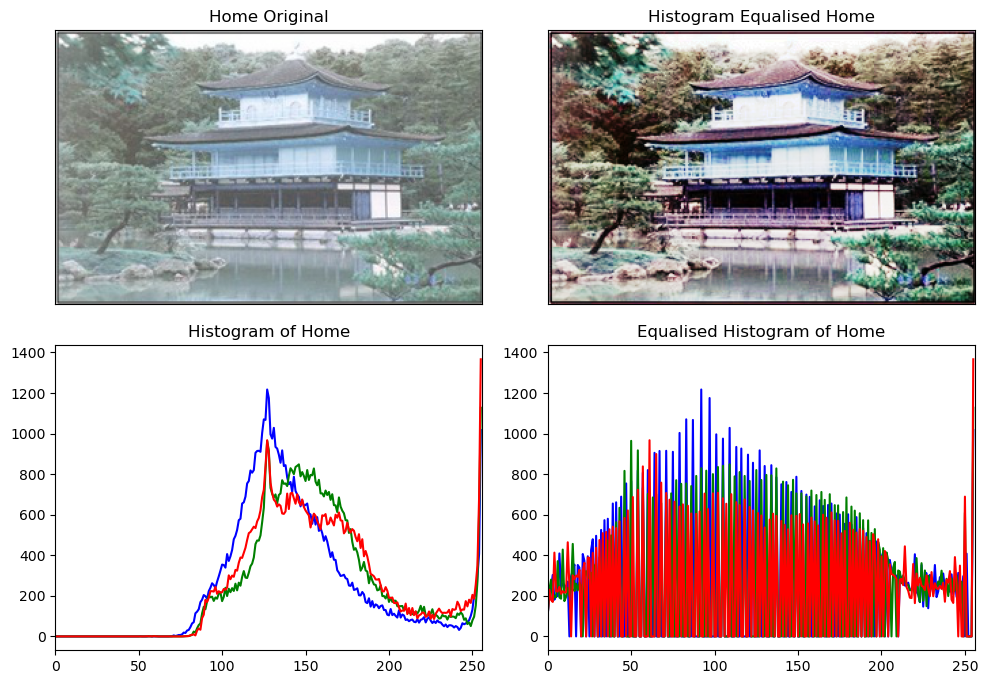

In [9]:
R,G,B = cv2.split(img_1) # splitting images in R G B

output_R = cv2.equalizeHist(R) # equalizing hist for color channel Red
output_G = cv2.equalizeHist(G)  # equalizing hist for color channel Red
output_B = cv2.equalizeHist(B)  # equalizing hist for color channel Red

output_Home = cv2.merge((output_R,output_G,output_B)) # merging all the equalized histogram

output_Home_res = np.hstack((img_1,output_Home)) # cv2.hconcat or np.hstack basically displaying the images side by side

# shiwing the image
cv2.imshow("Home", output_Home_res)
cv2.waitKey(0)
cv2.destroyAllWindows()

# plottingh the images

#plotting original homw image
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
plt.title("Home Original")
plt.imshow(img_1)
plt.xticks([])
plt.yticks([])

#plotting histogram equalised home
plt.subplot(2,2,2)
plt.title("Histogram Equalised Home")
plt.imshow(output_Home)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,3) # plotting histogram of the home 
plt.title("Histogram of Home")
for i,col in enumerate(color):
    histr = cv2.calcHist([img_1],[i], None, [256], [0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])


plt.subplot(2,2,4) # plotting equlaised histogram of the home
plt.title("Equalised Histogram of Home")
for i,col in enumerate(color):
    histr = cv2.calcHist([output_Home],[i], None, [256], [0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])


plt.tight_layout()
plt.show()

### **CLAHE (Contrast Limited Adaptive Histogram Equalization)**
https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html

**By OpenCV Documents**: In this, image is divided into small blocks called "tiles" (tileSize is 8x8 by default in OpenCV). Then each of these blocks are histogram equalized as usual. So in a small area, histogram would confine to a small region (unless there is noise). If noise is there, it will be amplified. To avoid this, contrast limiting is applied. If any histogram bin is above the specified contrast limit (by default 40 in OpenCV), those pixels are clipped and distributed uniformly to other bins before applying histogram equalization. After equalization, to remove artifacts in tile borders, bilinear interpolation is applied.

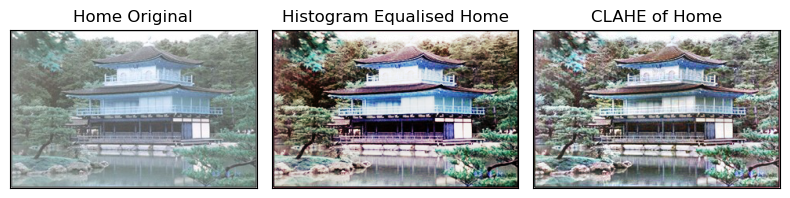

In [10]:
# create a CLAHE object (Arguments are optional).
#clahe = cv2.createCLAHE()
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl1_R = clahe.apply(R)
cl1_G = clahe.apply(G)
cl1_B = clahe.apply(B)

cli = cv2.merge((cl1_R,cl1_G,cl1_B))

plt.figure(figsize=(8,5))
plt.subplot(1,3,1)
plt.title("Home Original")
plt.imshow(img_1)
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,2)
plt.title("Histogram Equalised Home")
plt.imshow(output_Home)
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,3)
plt.title("CLAHE of Home")
plt.imshow(cli)
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

# cv2.imshow("Home",cli)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

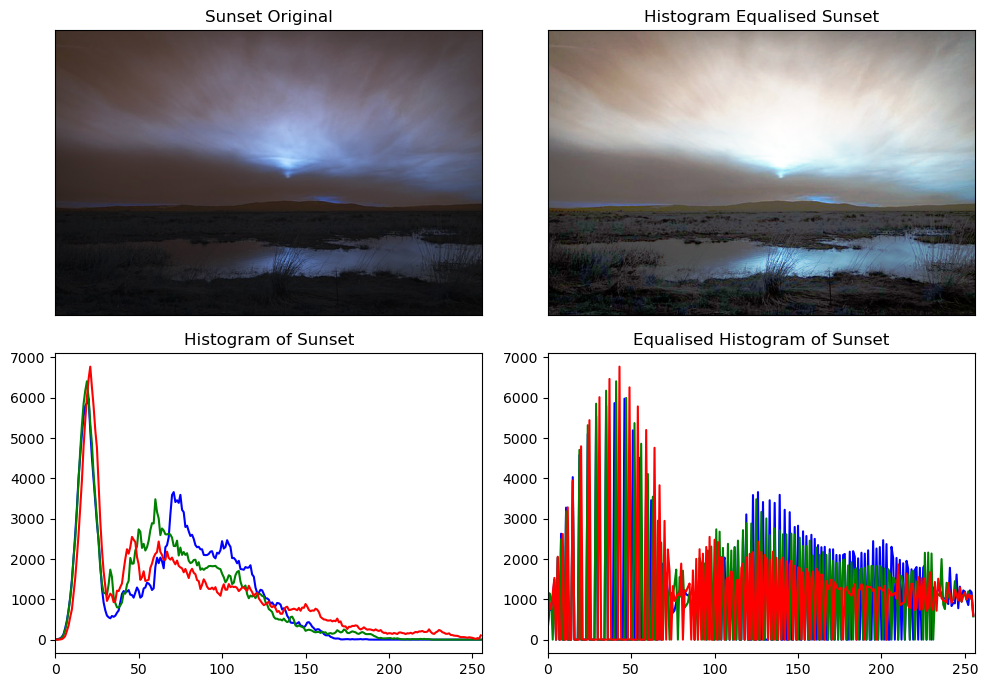

In [11]:
# Doing all the same thing as HOME
R_1,G_1,B_1 = cv2.split(img_2)

output_R_1 = cv2.equalizeHist(R_1)
output_G_1 = cv2.equalizeHist(G_1)
output_B_2 = cv2.equalizeHist(B_1)

output_Sunset = cv2.merge((output_R_1,output_G_1,output_B_2))

output_Sunset_res = np.hstack((img_2,output_Sunset))

cv2.imshow("Sunset", output_Sunset_res)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
plt.title("Sunset Original")
plt.imshow(img_2)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.title("Histogram Equalised Sunset")
plt.imshow(output_Sunset)
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,3)
plt.title("Histogram of Sunset")
for i,col in enumerate(color):
    histr = cv2.calcHist([img_2],[i], None, [256], [0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])

plt.subplot(2,2,4)
plt.title("Equalised Histogram of Sunset")
for i,col in enumerate(color):
    histr = cv2.calcHist([output_Sunset],[i], None, [256], [0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])

plt.tight_layout()
plt.show()

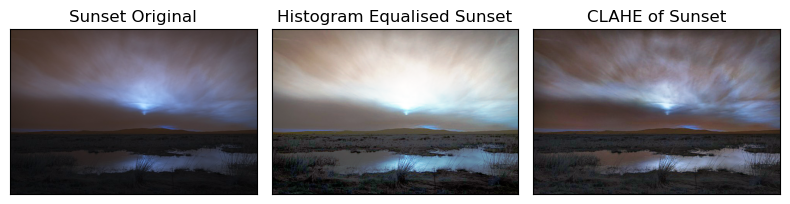

In [12]:

#clahe = cv2.createCLAHE()
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1_R_1 = clahe.apply(R_1)
cl1_G_1 = clahe.apply(G_1)
cl1_B_1 = clahe.apply(B_1)

cli_1 = cv2.merge((cl1_R_1,cl1_G_1,cl1_B_1))

plt.figure(figsize=(8,5))
plt.subplot(1,3,1)
plt.title("Sunset Original")
plt.imshow(img_2)
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,2)
plt.title("Histogram Equalised Sunset")
plt.imshow(output_Sunset)
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,3)
plt.title("CLAHE of Sunset")
plt.imshow(cli_1)
plt.xticks([])
plt.yticks([])


plt.tight_layout()
plt.show()

# cv2.imshow("Home",cli)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

#### Histogram Equalisation of Gray images

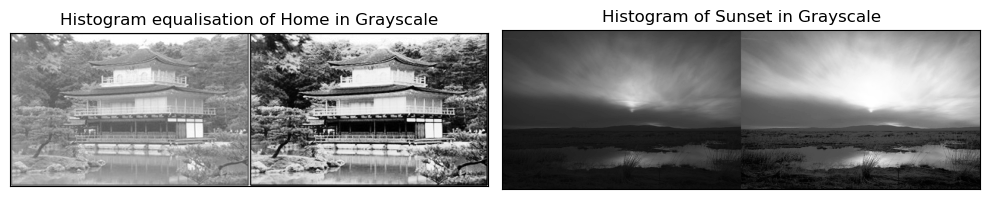

In [13]:
equ_1 = cv2.equalizeHist(img_1_gray)
equ_2 = cv2.equalizeHist(img_2_gray)
res_1 = np.hstack((img_1_gray,equ_1))
res_2 = np.hstack((img_2_gray,equ_2))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Histogram equalisation of Home in Grayscale")
plt.imshow(res_1, cmap='gray')
plt.xticks([])
plt.yticks([])


plt.subplot(1,2,2)
plt.title("Histogram of Sunset in Grayscale")
plt.imshow(res_2, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()
# cv2.imshow("Home", res_1)
# cv2.imshow("sunset", res_2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

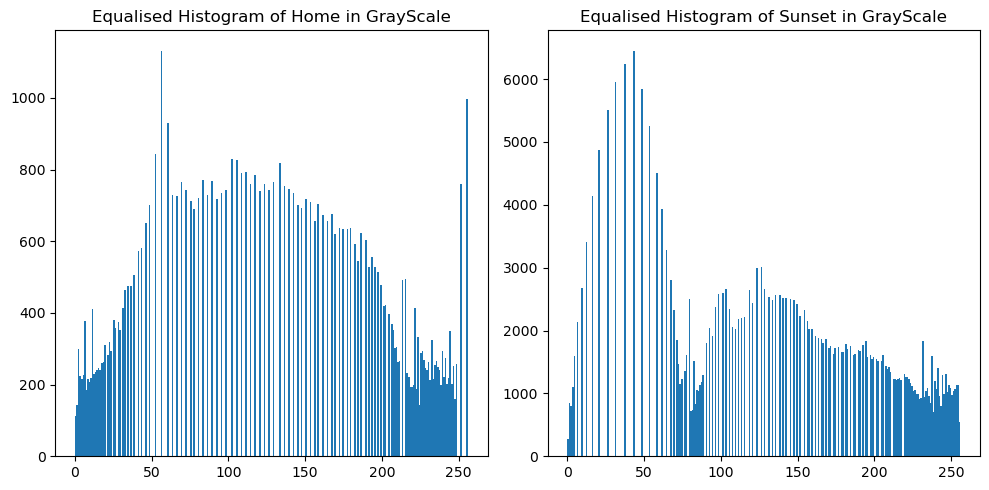

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(equ_1.ravel(), 256,[0,256])
plt.title("Equalised Histogram of Home in GrayScale")

plt.subplot(1,2,2)
plt.hist(equ_2.ravel(), 256,[0,256])
plt.title("Equalised Histogram of Sunset in GrayScale")

plt.tight_layout()
plt.show()

## **Gamma Correction**
https://docs.opencv.org/4.x/d3/dc1/tutorial_basic_linear_transform.html
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>O</mi>
  <mo>=</mo>
  <msup>
    <mrow data-mjx-texclass="INNER">
      <mo data-mjx-texclass="OPEN">(</mo>
      <mfrac>
        <mi>I</mi>
        <mn>255</mn>
      </mfrac>
      <mo data-mjx-texclass="CLOSE">)</mo>
    </mrow>
    <mrow>
      <mi>&#x3B3;</mi>
    </mrow>
  </msup>
  <mo>&#xD7;</mo>
  <mn>255</mn>
</math>

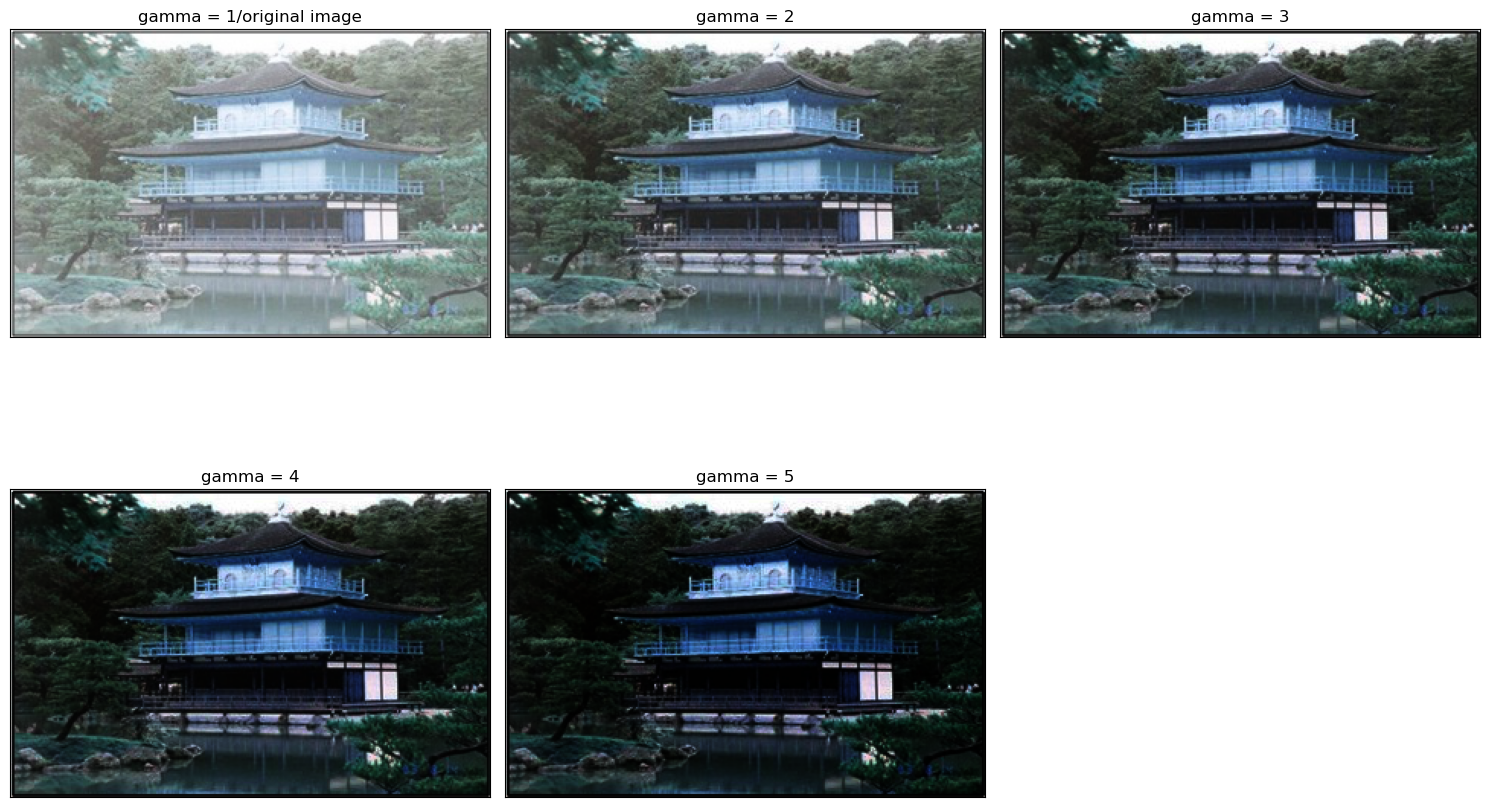

In [15]:
def gamma_correction(gamma, image): # defining gamma correction fxn
    lookuptable = np.empty((1,256), np.uint8) # making a empty table of size 1x256
    for i in  range(256):
        lookuptable[0,i] = np.clip(pow(i/255.0,gamma) * 255.0, 0, 255) #np.clip is limiting the values in the array

    res_gamma = cv2.LUT(image,lookuptable) # using inbuilt fxn for lookup table

    img_gamma_corrected = cv2.hconcat([image,res_gamma])

    return res_gamma

# cv2.imshow("Gamma corrected", gamma_correction(3))
# cv2.waitKey(0)
# cv2.destroyAllWindows()


#plotting images for different gamma values
plt.figure(figsize=(15,10))
titles = ["gamma = 1/original image", "gamma = 2", "gamma = 3", "gamma = 4", "gamma = 5"]
output = [gamma_correction(1,img_1),gamma_correction(2,img_1),gamma_correction(3,img_1),gamma_correction(4,img_1),gamma_correction(5,img_1)]
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(output[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
plt.show()

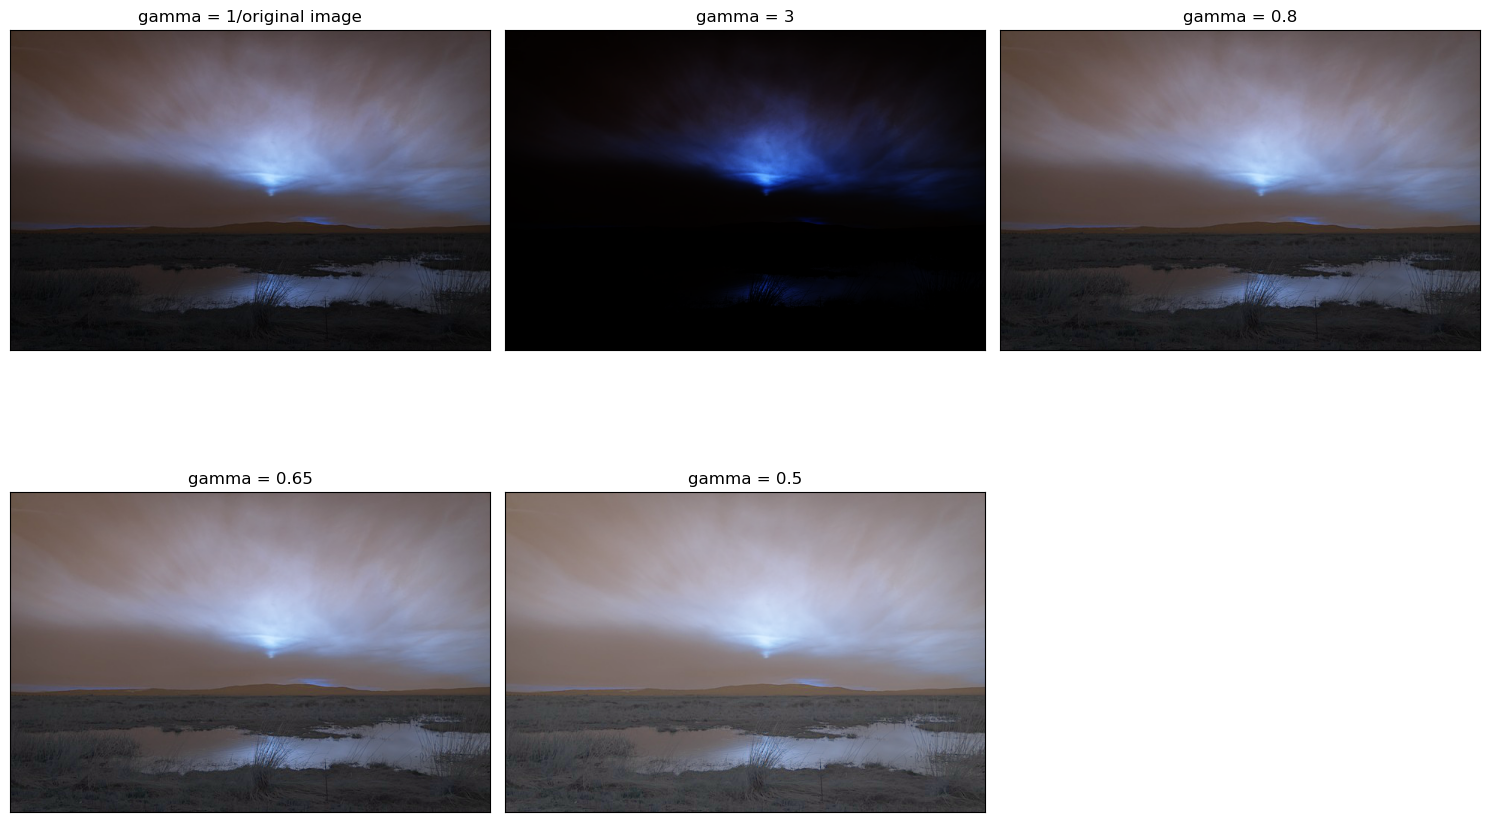

In [16]:
plt.figure(figsize=(15,10))
titles = ["gamma = 1/original image", "gamma = 3", "gamma = 0.8", "gamma = 0.65", "gamma = 0.5"]
output = [gamma_correction(1,img_2),gamma_correction(3,img_2),gamma_correction(0.8,img_2),gamma_correction(0.65,img_2),gamma_correction(0.5,img_2)]
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(output[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()    
plt.show()

https://www.geeksforgeeks.org/concatenate-images-using-opencv-in-python/

In [17]:
# Concating all the images together for better display
def concat_vh(list_2d): 
    
      # return final image 
    return cv2.vconcat([cv2.hconcat(list_h)  
                        for list_h in list_2d]) 
# # image resizing 
# img1_s = cv2.resize(img1, dsize = (0,0), fx = 0.5, fy = 0.5) 

# function calling 
img_tile = concat_vh([[cv2.resize(gamma_correction(1,img_2), dsize = (0,0), fx = 0.5, fy = 0.5), cv2.resize(gamma_correction(1.5,img_2), dsize = (0,0), fx = 0.5, fy = 0.5),cv2.resize(gamma_correction(3,img_2), dsize = (0,0), fx = 0.5, fy = 0.5)], 
                      [cv2.resize(gamma_correction(0.375,img_2), dsize = (0,0), fx = 0.5, fy = 0.5), cv2.resize(gamma_correction(0.5,img_2), dsize = (0,0), fx = 0.5, fy = 0.5), cv2.resize(gamma_correction(0.65,img_2), dsize = (0,0), fx = 0.5, fy = 0.5)], 
                      [cv2.resize(gamma_correction(0.7,img_2), dsize = (0,0), fx = 0.5, fy = 0.5), cv2.resize(gamma_correction(0.8,img_2), dsize = (0,0), fx = 0.5, fy = 0.5), cv2.resize(gamma_correction(0.9,img_2), dsize = (0,0), fx = 0.5, fy = 0.5)]]) 
  
# function calling 
# img_tile = concat_vh([[gamma_correction(1,img_2), gamma_correction(2,img_2), gamma_correction(3,img_2)], 
#                       [gamma_correction(0.25,img_2), gamma_correction(0.5,img_2), gamma_correction(0.65,img_2)], 
#                       [gamma_correction(0.75,img_2), gamma_correction(0.8,img_2), gamma_correction(0.9,img_2)]]) 
# show the output image 
cv2.imshow('concat_vh.jpg', img_tile)
cv2.waitKey(0)
cv2.destroyAllWindows()

## **Comparing Histogram and Gamma Correction**

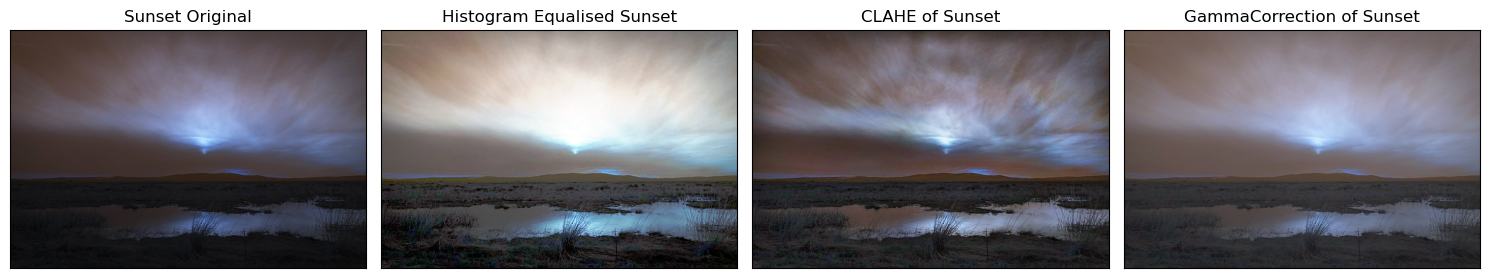

In [18]:
plt.figure(figsize=(15,15))
plt.subplot(1,4,1)
plt.title("Sunset Original")
plt.imshow(img_2)
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,2)
plt.title("Histogram Equalised Sunset")
plt.imshow(output_Sunset)
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,3)
plt.title("CLAHE of Sunset")
plt.imshow(cli_1)
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,4)
plt.title("GammaCorrection of Sunset")
plt.imshow(gamma_correction(0.65,img_2))
plt.xticks([])
plt.yticks([])


plt.tight_layout()
plt.show()


In [19]:
img_2_resized = cv2.resize(img_2,(256,256))
output_Sunset_resized = cv2.resize(output_Sunset,(256,256))
cli_1_resized = cv2.resize(cli_1,(256,256))
gamma_correction_resized = cv2.resize(gamma_correction(0.65,img_2),(256,256))
comparison_res_1 = cv2.hconcat([img_2_resized,output_Sunset_resized,cli_1_resized,gamma_correction_resized])
cv2.imshow("Comparison_1",comparison_res_1 )
cv2.waitKey(0)
cv2.destroyAllWindows()

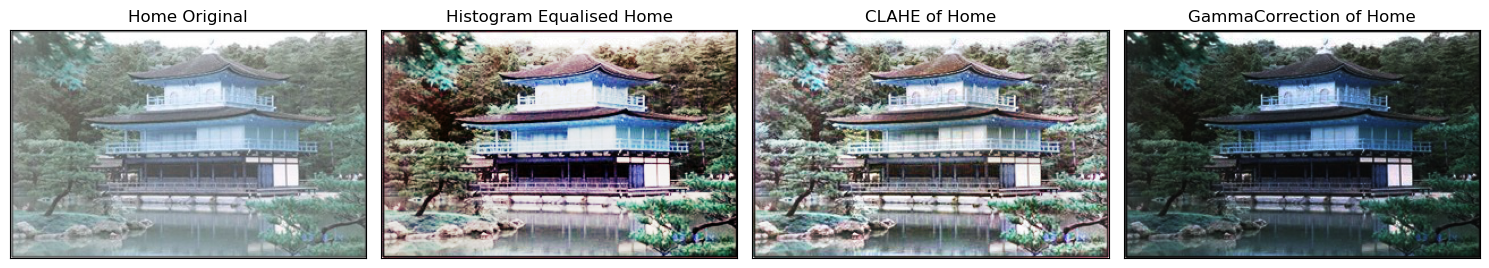

In [20]:
plt.figure(figsize=(15,15))
plt.subplot(1,4,1)
plt.title("Home Original")
plt.imshow(img_1)
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,2)
plt.title("Histogram Equalised Home")
plt.imshow(output_Home)
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,3)
plt.title("CLAHE of Home")
plt.imshow(cli)
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,4)
plt.title("GammaCorrection of Home")
plt.imshow(gamma_correction(3,img_1))
plt.xticks([])
plt.yticks([])


plt.tight_layout()
plt.show()


In [21]:
comparison_res = cv2.hconcat([img_1,output_Home,cli,gamma_correction(3,img_1)])
cv2.imshow("Comparison",comparison_res )
cv2.waitKey(0)
cv2.destroyAllWindows()